In [93]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [95]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [96]:
import yfinance as yf


start = '2015-01-01'
end = '2024-08-16'
df = yf.download('SUZLON.NS', start=start, end=end)

# Display the first few rows of the data
df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-09,55.299999,55.84,53.860001,55.369999,55.369999,33858415
2024-07-10,55.669998,56.00,53.900002,54.889999,54.889999,37727227
2024-07-11,55.000000,55.00,54.200001,54.720001,54.720001,26061094
2024-07-12,55.000000,55.43,53.650002,54.630001,54.630001,37499020
2024-07-16,54.900002,56.00,54.430000,55.880001,55.880001,76328147


In [97]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,13.451834,13.773209,13.268191,13.360013,13.360013,17265859
1,2015-01-02,13.314102,14.002763,13.314102,13.635477,13.635477,27192640
2,2015-01-05,13.635477,14.140495,13.497745,13.635477,13.635477,23258374
3,2015-01-06,13.360013,13.451834,12.579531,12.946816,12.946816,26790586
4,2015-01-07,12.900906,15.058709,12.763174,14.140495,14.140495,86932672


In [98]:
df = df.drop(['Date','Adj Close'], axis=1)

In [99]:
df.head()

,Open,High,Low,Close,Volume
0,13.451834,13.773209,13.268191,13.360013,17265859
1,13.314102,14.002763,13.314102,13.635477,27192640
2,13.635477,14.140495,13.497745,13.635477,23258374
3,13.360013,13.451834,12.579531,12.946816,26790586
4,12.900906,15.058709,12.763174,14.140495,86932672


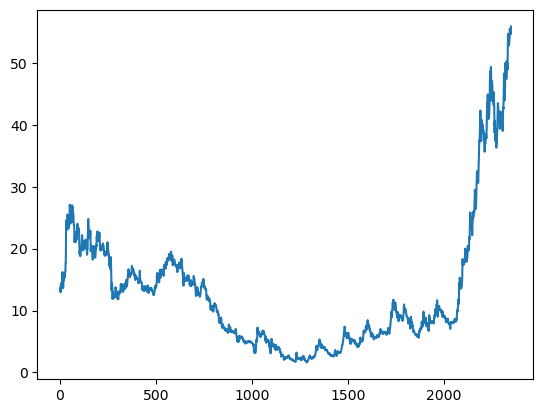

In [100]:
plt.plot(df.Close)

In [101]:
df

,Open,High,Low,Close,Volume
0,13.451834,13.773209,13.268191,13.360013,17265859
1,13.314102,14.002763,13.314102,13.635477,27192640
2,13.635477,14.140495,13.497745,13.635477,23258374
3,13.360013,13.451834,12.579531,12.946816,26790586
4,12.900906,15.058709,12.763174,14.140495,86932672
...,...,...,...,...,...
2347,55.299999,55.840000,53.860001,55.369999,33858415
2348,55.669998,56.000000,53.900002,54.889999,37727227
2349,55.000000,55.000000,54.200001,54.720001,26061094
2350,55.000000,55.430000,53.650002,54.630001,37499020


In [102]:
ma100 = df.Close.rolling(100).mean()

In [103]:
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
2347    44.5906
2348    44.6660
2349    44.7632
2350    44.8705
2351    44.9688
Name: Close, Length: 2352, dtype: float64

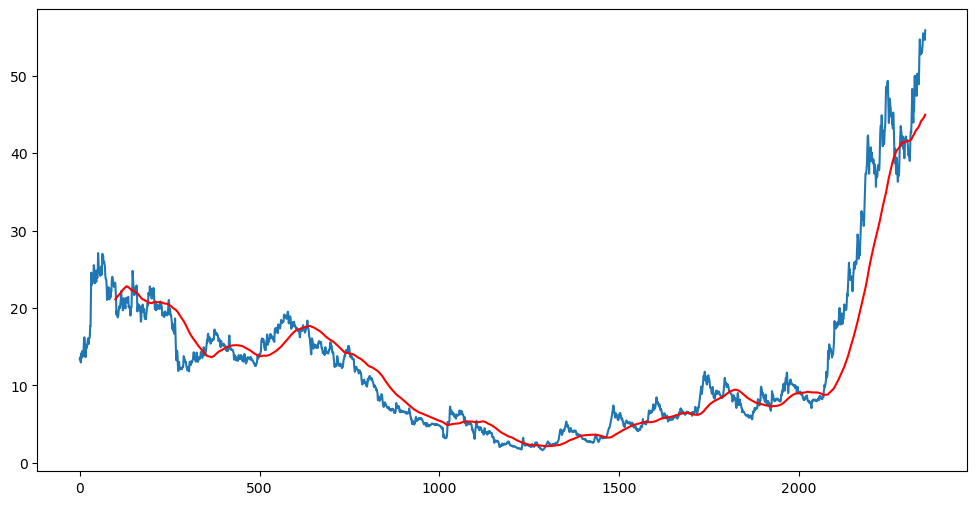

In [104]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [105]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2347    40.36855
2348    40.52900
2349    40.69185
2350    40.84875
2351    41.00715
Name: Close, Length: 2352, dtype: float64

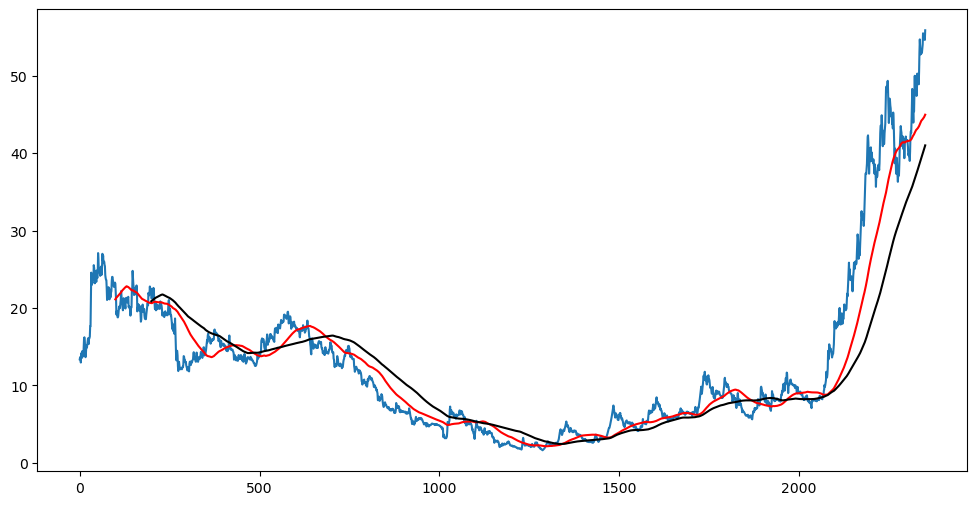

In [106]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'black')

In [107]:
df.shape

(2352, 5)

In [108]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1646, 1)
(706, 1)


In [109]:
data_training.tail()

,Close
1641,5.509283
1642,5.692926
1643,5.555194
1644,5.555194
1645,5.738837


In [110]:
data_testing.head()

,Close
1646,5.647015
1647,5.601105
1648,5.555194
1649,5.601105
1650,5.738837


In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))  # Use keyword argument syntax to specify feature_range

In [112]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.46126125],
       [0.47207206],
       [0.47207206],
       ...,
       [0.15495494],
       [0.15495494],
       [0.16216215]])

In [113]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])


x_train, y_train = np.array(x_train), np.array(y_train)

In [114]:
x_train

array([[[0.46126125],
        [0.47207206],
        [0.47207206],
        ...,
        [0.83963958],
        [0.85045042],
        [0.84504504]],

       [[0.47207206],
        [0.47207206],
        [0.44504502],
        ...,
        [0.85045042],
        [0.84504504],
        [0.79819813]],

       [[0.47207206],
        [0.44504502],
        [0.4918919 ],
        ...,
        [0.84504504],
        [0.79819813],
        [0.76216214]],

       ...,

       [[0.12072072],
        [0.11891891],
        [0.11711711],
        ...,
        [0.15315314],
        [0.15315314],
        [0.16036034]],

       [[0.11891891],
        [0.11711711],
        [0.12072072],
        ...,
        [0.15315314],
        [0.16036034],
        [0.15495494]],

       [[0.11711711],
        [0.12072072],
        [0.1063063 ],
        ...,
        [0.16036034],
        [0.15495494],
        [0.15495494]]])

In [115]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [116]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model = Sequential()
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model = Sequential()
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model = Sequential()
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [117]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [118]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0491
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0070
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0055
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0048
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0050
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0039
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0045
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0042
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0043
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0036
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0040
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0040
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0040
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0033
Epoch 15/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0036
Epoc

In [119]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 120)                 │          58,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,045 (687.68 KB)

 Trainable params: 58,681 (229.22 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 117,364 (458.46 KB)

In [120]:
model.save('keras_model.h5')

In [121]:
past_100_days = data_training.tail(100)

In [122]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [123]:
final_df.head()

,Close
0,4.682891
1,4.315605
2,4.453337
3,4.315605
4,4.361516


In [124]:
input_data = scaler.fit_transform(final_df)

In [125]:
input_data

array([[1.15233335e-02],
       [4.43204711e-03],
       [7.09127722e-03],
       [4.43204711e-03],
       [5.31846022e-03],
       [0.00000000e+00],
       [1.77281700e-03],
       [1.77281700e-03],
       [8.86394692e-04],
       [4.43204711e-03],
       [5.31846022e-03],
       [4.43204711e-03],
       [2.65923011e-03],
       [6.20487332e-03],
       [1.24097282e-02],
       [1.06369204e-02],
       [1.06369204e-02],
       [9.75050733e-03],
       [1.15233335e-02],
       [2.03874370e-02],
       [3.01379443e-02],
       [2.21602540e-02],
       [2.12738409e-02],
       [1.95010239e-02],
       [1.95010239e-02],
       [2.03874370e-02],
       [1.86146108e-02],
       [1.77282069e-02],
       [1.77282069e-02],
       [1.68417938e-02],
       [2.57058972e-02],
       [2.30466671e-02],
       [2.21602540e-02],
       [2.21602540e-02],
       [2.57058972e-02],
       [3.54564229e-02],
       [4.60933434e-02],
       [5.14117944e-02],
       [4.96389866e-02],
       [4.34341133e-02],


In [126]:
input_data.shape

(806, 1)

In [127]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [128]:
x_test,y_test = np.array(x_test), np.array(y_test)

In [129]:
x_test.shape
y_test.shape

(706,)

In [130]:
#making predictions

y_predicted = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [131]:
y_predicted.shape

(706, 1)

In [132]:
y_test

array([0.03013794, 0.02925155, 0.02836513, 0.02925155, 0.03191077,
       0.03191077, 0.03634282, 0.03722923, 0.03634282, 0.03545642,
       0.03634282, 0.03457   , 0.03457   , 0.03368359, 0.03279719,
       0.03279719, 0.03102436, 0.03545642, 0.03545642, 0.03634282,
       0.04166128, 0.04697976, 0.04254769, 0.04697976, 0.05052538,
       0.05673025, 0.05141179, 0.04697976, 0.04609334, 0.05229822,
       0.04786615, 0.04520692, 0.04697976, 0.04609334, 0.04343411,
       0.04609334, 0.04432053, 0.04077488, 0.04077488, 0.04609334,
       0.04520692, 0.04432053, 0.04697976, 0.04875256, 0.04697976,
       0.04520692, 0.04697976, 0.04697976, 0.04432053, 0.04520692,
       0.04432053, 0.04343411, 0.04254769, 0.04343411, 0.04432053,
       0.04609334, 0.04254769, 0.03811565, 0.04254769, 0.04786615,
       0.04609334, 0.04520692, 0.04520692, 0.04520692, 0.04786615,
       0.05407102, 0.06027591, 0.05407102, 0.05052538, 0.05052538,
       0.04609334, 0.04166128, 0.04697976, 0.05318463, 0.05938

In [133]:
y_predicted

array([[0.04760765],
       [0.04766454],
       [0.047609  ],
       [0.04744063],
       [0.04743375],
       [0.04782622],
       [0.04816744],
       [0.04913779],
       [0.05010986],
       [0.05083266],
       [0.05133335],
       [0.05189319],
       [0.05209817],
       [0.052265  ],
       [0.05225749],
       [0.05210285],
       [0.05195282],
       [0.05154286],
       [0.0518401 ],
       [0.05207969],
       [0.05242684],
       [0.05352119],
       [0.0552537 ],
       [0.05610436],
       [0.05752023],
       [0.05924903],
       [0.06164704],
       [0.06292583],
       [0.0633858 ],
       [0.06362127],
       [0.06468318],
       [0.0648987 ],
       [0.06467979],
       [0.06471653],
       [0.06457867],
       [0.06404792],
       [0.06396227],
       [0.06360392],
       [0.06277005],
       [0.06204414],
       [0.06218569],
       [0.06216951],
       [0.06204605],
       [0.06234363],
       [0.06286559],
       [0.06306861],
       [0.06299892],
       [0.063

In [134]:
scaler.scale_

array([0.01930727])

In [135]:
scale_factor = 1/0.00565331
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

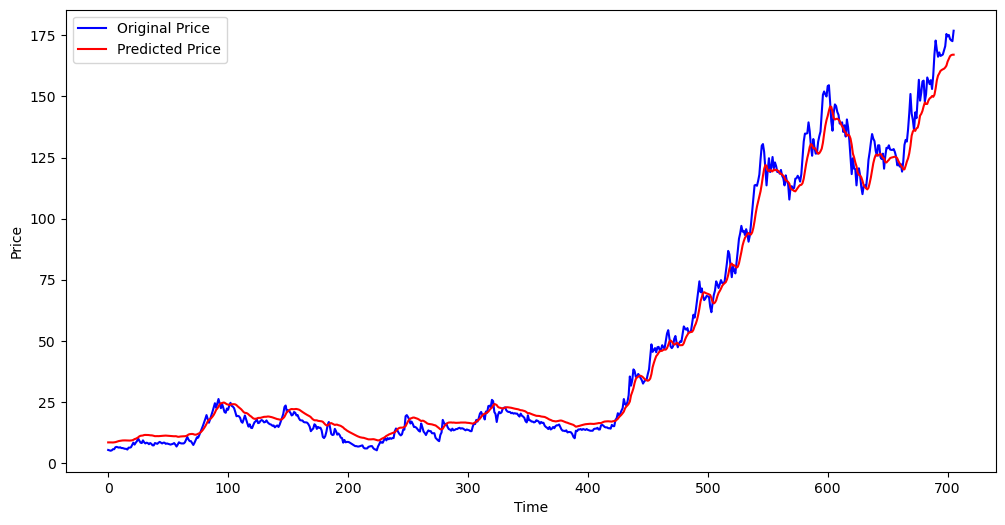

In [136]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'b', label = 'Original Price')
plt.plot(y_predicted,'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show() 
